# Housing Market in Ontario 2022

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import numpy as np
import requests
import scipy.stats as st

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

# Import API key
from api_keys import geoapify_key

In [29]:
# Data Path
data_path = "Resources/properties.csv"

# Read the mouse data and the study results
data = pd.read_csv(data_path)

data_df = pd.DataFrame(data)
data_df.head()

,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118


In [3]:
# Clean up data
data_df = data_df.loc[:, ~data_df.columns.str.contains("^Unnamed")]
data_df

,Address,AreaName,Price ($),lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...
25346,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [4]:
data_df.rename(columns={'Price ($)': 'Price'}, inplace=True)
data_df

,Address,AreaName,Price,lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...
25346,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [5]:
#Remove houses sold more than once in the period and considered only the last price
clean_data_df = data_df.drop_duplicates(subset=['Address'],keep="last")
clean_data_df

,Address,AreaName,Price,lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...
25346,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


# Disregard extreme values

In [6]:
#Eliminating houses with price <= 100000 and >= 10000000
clean_data_df = clean_data_df[(clean_data_df['Price'] >= 100000) & (clean_data_df['Price'] <= 10000000)]
clean_data_df

,Address,AreaName,Price,lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...
25346,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


# TOP 20 Rank by area with highest # of houses sold in ONTARIO


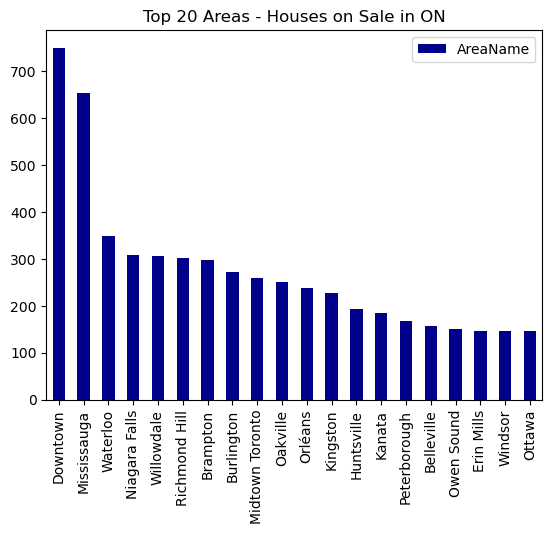

In [7]:
#Creating a TOP 20 Rank by area with higher # of houses sold
top_20 = pd.DataFrame(clean_data_df['AreaName'].value_counts())
top_20.sort_values(by='AreaName')
top_20[0:20].plot(kind='bar',color='darkblue' ,title='Top 20 Areas - Houses on Sale in ON')
plt.savefig("output_data/fig1")
plt.show()

# TOP 20 Rank by area with highest average price in ONTARIO


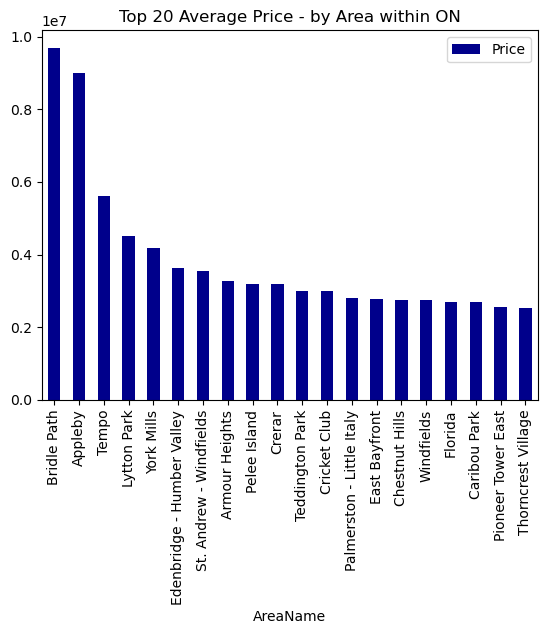

In [8]:
#Mean Price by Area(Top 20 - highest Average Price in ON) 
clean_data_dropped = clean_data_df.drop(['Address','lat','lng'], axis=1)
mean_prices = clean_data_dropped.groupby(['AreaName']).mean().sort_values(by='Price', axis=0, ascending=False)
mean_prices_top20 = mean_prices[0:20] 
mean_prices_top20.plot(kind='bar', color='darkblue' ,title='Top 20 Average Price - by Area within ON')
plt.savefig("output_data/fig2")
plt.show()

# TOP 20 Rank by area - Boxplot ONTARIO

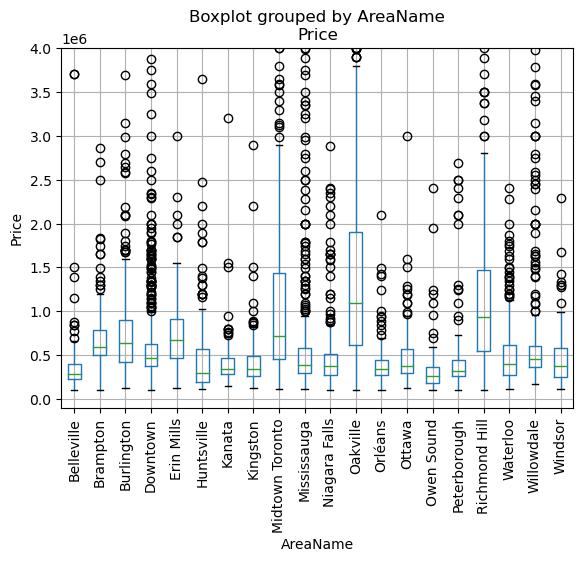

In [9]:
#Boxplot 
top_region = list(top_20[0:20].index)
area = clean_data_df[clean_data_df['AreaName'].isin(top_region)]
#print(topAreasNames)
box_ax = area.boxplot(column='Price', by='AreaName', rot=90, grid=True)
box_ax.set_ylim(-1e5, 4e6)
plt.ylabel("Price")
plt.savefig("output_data/fig3")
plt.show()

# Housing Market in TORONTO

In [10]:
#Getting only adresses in Toronto
toronto_data = clean_data_df[clean_data_df['Address'].str.contains('Toronto,')]
toronto_data_df = pd.DataFrame(toronto_data)

toronto_avg_area = toronto_data_df.groupby(['AreaName']).mean().round(2)["Price"]
toronto_avg_area_df = pd.DataFrame(toronto_avg_area)
# toronto_avg_area_df

# Top 20 highest average prices by Area in TORONTO

In [11]:
#Merge Average price by area (within Toronto) into the DataFrame
toronto_df_merged = pd.merge(toronto_data_df, toronto_avg_area_df['Price'], on=['AreaName'], how='left', suffixes=('', '_Avg'))


In [12]:
#Get the Top 20 highest average prices by Area and display a map plot
toronto_df_higher = toronto_df_merged.sort_values("Price_Avg", ascending = False)
toronto_top_higher = pd.DataFrame(toronto_df_higher[0:20])
# toronto_top_higher

In [13]:
%%capture --no-display
map_plot_1 = toronto_top_higher.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "OSM",
    alpha=0.6,
    frame_width = 600,
    frame_height = 500,
    size = "Price_Avg",
    scale = 0.01,
    color = "AreaName",
    hover_cols = ['Address', 'AreaName','Price'])
plt.savefig("output_data/map1")
# Display the map plot
map_plot_1


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (AreaName,Price_Avg,Address,Price)

<Figure size 640x480 with 0 Axes>

# Botton 20 smallest average prices by Area in TORONTO

In [14]:
#Get the Top 20 botton average prices by Area and display a map plot
toronto_df_botton = toronto_df_merged.sort_values("Price_Avg", ascending = True)
toronto_top_botton = toronto_df_botton[0:20]
# toronto_top_botton

In [15]:
%%capture --no-display
map_plot_2 = toronto_top_botton.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "OSM",
    alpha=0.6,
    frame_width = 700,
    frame_height = 500,
    size = "Price_Avg",
    scale = 0.05,
    color = "AreaName",
    hover_cols = ['Address', 'AreaName','Price'])

plt.savefig("output_data/map2")
# Display the map plot
map_plot_2


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (AreaName,Price_Avg,Address,Price)

<Figure size 640x480 with 0 Axes>

# Housing Market in GTA

In [16]:
#Getting only adresses in GTA (excluding Toronto)
gta_data = clean_data_df[clean_data_df['Address'].str.contains('Ajax,|Aurora,|Brampton,|Brock,|Burlington,|Caledon,|Clarington,|East Gwillimbury,|Georgina,|Halton Hills,|King,|Markham,|Milton,|Mississauga,|Newmarket,|Oakville,|Oshawa,|Pickering,|Richmond Hill,|Scugog,|Uxbridge,|Vaughan,|Whitby,|Whitchurch-Stouffville,',regex=True)]
gta_data_df = pd.DataFrame(gta_data)

gta_avg_area = gta_data_df.groupby(['AreaName']).mean().round(2)["Price"]
gta_avg_area_df = pd.DataFrame(gta_avg_area)
# gta_avg_area_df                


In [17]:
#Merge Average price by Area (in GTA - excluding Toronto) into the DataFrame
gta_df_merged = pd.merge(gta_data_df, gta_avg_area_df['Price'], on=['AreaName'], how='left', suffixes=('', '_Avg'))
# gta_df_merged

# Top 20 highest average prices by Area in GTA

In [18]:
#Get the Top 20 highest average prices by Area and display a map plot
gta_df_higher = gta_df_merged.sort_values("Price_Avg", ascending = False)
gta_top_higher = pd.DataFrame(gta_df_higher[0:20])
# gta_top_higher

In [19]:
%%capture --no-display
map_plot_3 = gta_top_higher.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "OSM",
    alpha=0.6,
    frame_width = 600,
    frame_height = 500,
    size = "Price_Avg",
    scale = 0.01,
    color = "AreaName",
    hover_cols = ['Address', 'AreaName','Price'])

plt.savefig("output_data/map3")
# Display the map plot
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (AreaName,Price_Avg,Address,Price)

<Figure size 640x480 with 0 Axes>

# Botton 20 smallest average prices by Area in GTA

In [20]:
#Get the Top 20 botton average prices by Area and display a map plot
gta_df_botton = gta_df_merged.sort_values("Price_Avg", ascending = True)
gta_top_botton = pd.DataFrame(gta_df_botton[0:20])
# gta_top_botton

In [21]:
%%capture --no-display
map_plot_4 = gta_top_botton.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "OSM",
    alpha=0.6,
    frame_width = 600,
    frame_height = 500,
    size = "Price_Avg",
    scale = 0.03,
    color = "AreaName",
    hover_cols = ['Address', 'AreaName','Price'])

plt.savefig("output_data/map4")
# Display the map plot
map_plot_4

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (AreaName,Price_Avg,Address,Price)

<Figure size 640x480 with 0 Axes>

In [22]:
#create a DataFrame with the top 5 highest and smallest avg price within Toronto to call an API
toronto_5top_higher = pd.DataFrame(toronto_top_higher[0:5])
toronto_5top_botton = pd.DataFrame(toronto_top_botton[0:5])
frames = [toronto_5top_higher,toronto_5top_botton]

toronto_5top_merged = pd.concat(frames)
toronto_5top_merged


# Add an empty columns to the DataFrame so we can store the results found using the Geoapify API
toronto_5top_merged["Nearest School"] = ''
toronto_5top_merged["# of Schools"] = ''
toronto_5top_merged["Nearest Daycare"] = ''
toronto_5top_merged["# of Daycares"] = ''
toronto_5top_merged["Nearest Healthcare"] = ''
toronto_5top_merged["# of Healthcares"] = ''

# Display sample data
# toronto_5top_merged

# Amenities in the neighborhood of the top 5 highest and botton 5 smallest average price on TORONTO

In [23]:
# Set parameters to search for a schools & childcare & healthcare - toronto_top_higher
radius = 10000 

params_school = {
        "categories":"education.school",
        "apiKey":geoapify_key,
        "limit":5}

params_childcare = {"categories":"childcare",
         "apiKey":geoapify_key,
         "limit":5}

params_healthcare = {"categories":"healthcare",
         "apiKey":geoapify_key,
         "limit":5}

# Print a message to follow up the search
print("Starting search")

# Iterate through the DataFrame
for index, row in toronto_5top_merged.iterrows():

    # get latitude, longitude from the DataFrame
    latitude = row['lat']
    longitude = row['lng']
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params_school["filter"] =  f"circle:{longitude},{latitude},{radius}" 
    params_school["bias"] = f"proximity:{longitude},{latitude}" 
    
    params_childcare["filter"] =  f"circle:{longitude},{latitude},{radius}" 
    params_childcare["bias"] = f"proximity:{longitude},{latitude}"
    
    params_healthcare["filter"] =  f"circle:{longitude},{latitude},{radius}" 
    params_healthcare["bias"] = f"proximity:{longitude},{latitude}"
     
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"
               
    # Make and API request using the params dictionaty
    school_address = requests.get(base_url, params=params_school)
    childcare_address = requests.get(base_url, params=params_childcare)
    healthcare_address = requests.get(base_url, params=params_healthcare)
    
    # Convert the API response to JSON format
    school_address = school_address.json() 
    childcare_address = childcare_address.json() 
    healthcare_address = healthcare_address.json()
    
    try:
        toronto_5top_merged.loc[index, "Nearest School"] = school_address["features"][0]["properties"]["name"]
        toronto_5top_merged.loc[index, "# of Schools"] = len(school_address["features"][0]["properties"]["name"])
        toronto_5top_merged.loc[index, "Nearest Daycare"] = childcare_address["features"][0]["properties"]["name"]
        toronto_5top_merged.loc[index, "# of Daycares"] = len(childcare_address["features"][0]["properties"]["name"])
        toronto_5top_merged.loc[index, "Nearest Healthcare"] = healthcare_address["features"][0]["properties"]["name"]
        toronto_5top_merged.loc[index, "# of Healthcares"] = len(healthcare_address["features"][0]["properties"]["name"])
    except (KeyError, IndexError):
        toronto_5top_merged.loc[index, "Schools"] = "No Schools Here"
        toronto_5top_merged.loc[index, "Daycare"] = "No Daycare Here"
        toronto_5top_merged.loc[index, "Healthcare"] = "No Healthcare Here" 
    print("done")
# Log the search results
toronto_5top_merged

Starting search
done
done
done
done
done
done
done
done
done
done


,Address,AreaName,Price,lat,lng,Price_Avg,Nearest School,# of Schools,Nearest Daycare,# of Daycares,Nearest Healthcare,# of Healthcares
4093,"45 PARK LANE CIRC Toronto, ON",Bridle Path,9688000,43.729534,-79.369606,9688000.00,Park Lane Public School,23,The Lawrence Park School,24,Sunnybrook Health Sciences Centre - Bayview Ca...,50
1376,"28 COSMIC DR Toronto, ON",Windfields,3488000,43.749664,-79.373573,5115554.29,York Mills Collegiate Institute,31,Hillcrest Progressive School,28,Dr. R. C. Thomas Dental Surgeon,31
3713,"24 Daleberry Pl Toronto, ON",Windfields,5998000,43.746918,-79.376839,5115554.29,York Mills Collegiate Institute,31,Hillcrest Progressive School,28,Shoppers Drug Mart,18
1298,"16 Larkfield Dr Toronto, ON",Windfields,3388000,43.737522,-79.358696,5115554.29,Rippleton Public School,23,Abacus Montesori,16,Don Mills + Lawrence Pharmacy,29
3005,"9 Cicada Crt Toronto, ON",Windfields,1958000,43.739819,-79.358345,5115554.29,Rippleton Public School,23,Abacus Montesori,16,Don Mills + Lawrence Pharmacy,29
3699,"3255 Dufferin St Toronto, ON",Yorkdale,115000,43.720497,-79.456047,146750.00,Yorkdale Secondary School,25,Dane Av Child Care,18,Quiick Medicine - Compounding Pharmacy,38
3891,"3129 Dufferin St Toronto, ON",Yorkdale,178500,43.716667,-79.455254,146750.00,Lawrence Heights Middle School,30,Dane Av Child Care,18,Dufferin Dental Clinic,22
3224,"2340 BLOOR ST Toronto, ON",Bloor West Village,189000,43.650421,-79.480957,189000.00,St. Pius X Catholic School,26,Le Patite Ecole,15,Paleolife Massage Therapy,25
2268,"Bloor Street Toronto, ON",Mississauga,221500,43.616276,-79.595207,221500.00,Burnhamthorpe Public School,27,Williamsport Child Care Centre,30,Main Drug Mart,14
4368,"598 YONGE ST Toronto, ON",Bay Cloverhill,249000,43.665531,-79.385147,249000.00,St. Joseph's College School,27,Queen's Park Child Care Centre,30,Shoppers Drug Mart,18


In [24]:
%%capture --no-display

# Configure the map plot
plot_map5 = toronto_5top_merged.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "OSM",
    size = "Price_Avg",
    scale = 0.02,
    color = "AreaName",
    alpha = 0.5,
    hover_cols = ["Price", "Nearest School", "Nearest Daycare", "Nearest Healthcare", "# of Schools", "# of Daycares", "# of Healthcares"]
)

plt.savefig("output_data/map5")
# Display the map
plot_map5

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (AreaName,Price_Avg,Price,Nearest School,Nearest Daycare,Nearest Healthcare,# of Schools,# of Daycares,# of Healthcares)

<Figure size 640x480 with 0 Axes>

# To Compare Average Price of the top 5 most expensive area with the botton 5 cheapest area - TORONTO

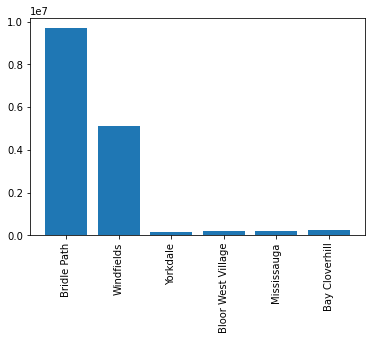

In [26]:
plt.bar(toronto_5top_merged["AreaName"],toronto_5top_merged["Price_Avg"])
plt.xticks(rotation = 90)
plt.savefig("output_data/fig4")
plt.show()

> To add the Min. and Max. PRICE with the above chart on the PRESENTATION

In [27]:
#To add the Min and Max with the above chart on the presentation
rank_toronto = pd.DataFrame(toronto_5top_merged.describe().round(2))
rank_toronto['Price'] = rank_toronto['Price'].astype(float).map("${:,.2f}".format)
rank_toronto

,Price,lat,lng,Price_Avg
count,$10.00,10.00,10.00,10.00
mean,"$2,547,300.00",43.71,-79.42,3110321.72
std,"$3,207,912.07",0.05,0.08,3366200.80
min,"$115,000.00",43.62,-79.60,146750.00
25%,"$197,125.00",43.68,-79.46,197125.00
50%,"$1,103,500.00",43.73,-79.38,2682277.14
75%,"$3,463,000.00",43.74,-79.37,5115554.29
max,"$9,688,000.00",43.75,-79.36,9688000.00


# Toronto - Amenities PieChart

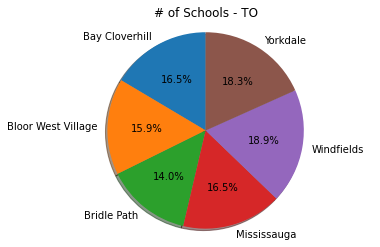

In [28]:
# Pie Graph of Healthcare count
plt.title("# of Schools - TO")
group_school = toronto_5top_merged.groupby(["AreaName"]).max()["# of Schools"].reset_index()
# group_school
plt.pie(group_school['# of Schools'], labels = group_school["AreaName"], autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("output_data/fig5")
plt.show()

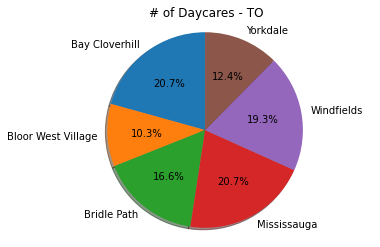

In [29]:
# Pie Graph of Healthcare count
plt.title("# of Daycares - TO")
group_daycare = toronto_5top_merged.groupby(["AreaName"]).max()["# of Daycares"].reset_index()
# group_daycare
plt.pie(group_daycare['# of Daycares'], labels = group_daycare["AreaName"], autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("output_data/fig6")
plt.show()

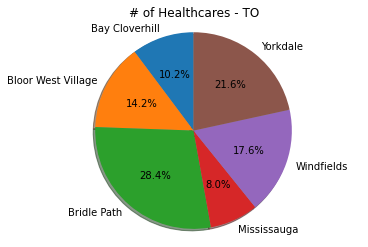

In [30]:
# Pie Graph of Healthcare count
plt.title("# of Healthcares - TO")
group = toronto_5top_merged.groupby(["AreaName"]).max()["# of Healthcares"].reset_index()
# group
plt.pie(group['# of Healthcares'], labels = group["AreaName"], autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("output_data/fig7")
plt.show()

# Amenities in the neighborhood of the top 5 highest and botton 5 smallest average price on GTA

In [31]:
#create a DataFrame with the top 5 highest and smallest avg price within GTA to call an API
gta_5top_higher = pd.DataFrame(gta_top_higher[0:5])
gta_5top_botton = pd.DataFrame(gta_top_botton[0:5])
frames1 = [gta_5top_higher,gta_5top_botton]

gta_5top_merged = pd.concat(frames1)


# Add an empty columns to the DataFrame so we can store the results found using the Geoapify API
gta_5top_merged["Nearest School"] = ''
gta_5top_merged["# of Schools"] = ''
gta_5top_merged["Nearest Daycare"] = ''
gta_5top_merged["# of Daycares"] = ''
gta_5top_merged["Nearest Healthcare"] = ''
gta_5top_merged["# of Healthcares"] = ''

# Display sample data
# toronto_5top_merged

In [25]:
# Set parameters to search for a schools & childcare & healthcare - toronto_top_higher
radius = 10000 

params_school = {
        "categories":"education.school",
        "apiKey":geoapify_key,
        "limit":5}

params_childcare = {"categories":"childcare",
         "apiKey":geoapify_key,
         "limit":5}

params_healthcare = {"categories":"healthcare",
         "apiKey":geoapify_key,
         "limit":5}

# Print a message to follow up the search
print("Starting search")

# Iterate through the DataFrame
for index, row in gta_5top_merged.iterrows():

    # get latitude, longitude from the DataFrame
    latitude = row['lat']
    longitude = row['lng']
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params_school["filter"] =  f"circle:{longitude},{latitude},{radius}" 
    params_school["bias"] = f"proximity:{longitude},{lat itude}" 
    
    params_childcare["filter"] =  f"circle:{longitude},{latitude},{radius}" 
    params_childcare["bias"] = f"proximity:{longitude},{latitude}"
    
    params_healthcare["filter"] =  f"circle:{longitude},{latitude},{radius}" 
    params_healthcare["bias"] = f"proximity:{longitude},{latitude}"
     
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"
               
    # Make and API request using the params dictionaty
    school_address = requests.get(base_url, params=params_school)
    childcare_address = requests.get(base_url, params=params_childcare)
    healthcare_address = requests.get(base_url, params=params_healthcare)
    
    # Convert the API response to JSON format
    school_address = school_address.json() 
    childcare_address = childcare_address.json() 
    healthcare_address = healthcare_address.json()
    
    try:
        gta_5top_merged.loc[index, "Nearest School"] = school_address["features"][0]["properties"]["name"]
        gta_5top_merged.loc[index, "# of Schools"] = len(school_address["features"][0]["properties"]["name"])
        gta_5top_merged.loc[index, "Nearest Daycare"] = childcare_address["features"][0]["properties"]["name"]
        gta_5top_merged.loc[index, "# of Daycares"] = len(childcare_address["features"][0]["properties"]["name"])
        gta_5top_merged.loc[index, "Nearest Healthcare"] = healthcare_address["features"][0]["properties"]["name"]
        gta_5top_merged.loc[index, "# of Healthcares"] = len(healthcare_address["features"][0]["properties"]["name"])
    except (KeyError, IndexError):
        gta_5top_merged.loc[index, "Schools"] = "0"
        gta_5top_merged.loc[index, "Daycare"] = "0"
        gta_5top_merged.loc[index, "Healthcare"] = "0" 
    print("done")
# Log the search results
gta_5top_merged

SyntaxError: f-string: invalid syntax (2233278457.py, line 29)

In [26]:
#clear GTA data to remove NULL values

gta_5top_dropped = gta_5top_merged.drop(columns=['Schools', 'Daycare','Healthcare'])
gta_5top_dropped['# of Daycares'] = gta_5top_dropped['# of Daycares'].replace("", 0)
gta_5top_dropped['# of Healthcares'] = gta_5top_dropped['# of Healthcares'].replace("", 0)

gta_5top_dropped['Nearest Daycare'] = gta_5top_dropped['Nearest Daycare'].replace("", 'Not Found')
gta_5top_dropped['Nearest Healthcare'] = gta_5top_dropped['Nearest Healthcare'].replace("", 'Not Found')

gta_5top_dropped

NameError: name 'gta_5top_merged' is not defined

In [27]:
%%capture --no-display

# Configure the map plot
plot_map6 = gta_5top_dropped.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "OSM",
    size = "Price_Avg",
    scale = 0.02,
    color = "AreaName",
    alpha = 0.5,
    hover_cols = ["Price", "Nearest School", "Nearest Daycare", "Nearest Healthcare", "# of Schools", "# of Daycares", "# of Healthcares"]
    
)

plt.savefig("output_data/map6")
# Display the map
plot_map6

NameError: name 'gta_5top_dropped' is not defined

# To Compare Average Price of the top 5 most expensive area with the botton 5 cheapest area - GTA

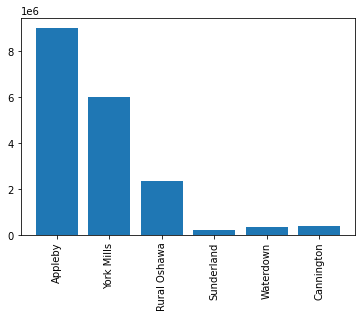

In [35]:
plt.bar(gta_5top_dropped["AreaName"],gta_5top_dropped["Price_Avg"])
plt.xticks(rotation = 90)
plt.savefig("output_data/fig8")
plt.show()

> To add the Min. and Max. PRICE with the above chart on the PRESENTATION

In [36]:
#To add the Min and Max with the above chart on the presentation
rank_gta = pd.DataFrame(gta_5top_dropped.describe().round(2))
rank_gta_drop = rank_gta.drop(columns=['lat', 'lng','Price_Avg', '# of Daycares', '# of Healthcares'])
rank_gta_drop['Price'] = rank_gta_drop['Price'].astype(float).map("${:,.2f}".format)
rank_gta_drop

,Price
count,$10.00
mean,"$2,597,670.00"
std,"$3,006,537.22"
min,"$210,000.00"
25%,"$364,675.00"
50%,"$1,344,950.00"
75%,"$4,000,000.00"
max,"$9,000,000.00"


# Toronto - Amenities PieChart

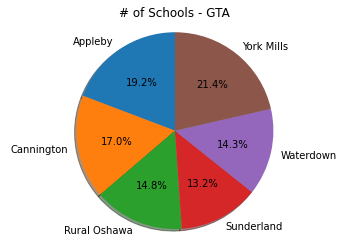

In [37]:
# Pie Graph of Healthcare count
plt.title("# of Schools - GTA")
group_school_g = gta_5top_dropped.groupby(["AreaName"]).max()["# of Schools"].reset_index()
# group_school
plt.pie(group_school_g['# of Schools'], labels = group_school_g["AreaName"], autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("output_data/fig9")
plt.show()

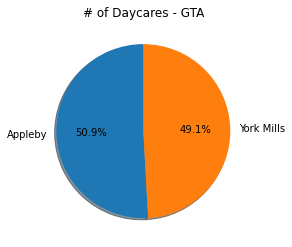

In [38]:
# Pie Graph of Daycare count
#To remove zero values
group_daycare_g = gta_5top_dropped.groupby(["AreaName"]).max()["# of Daycares"].reset_index()
group_daycare_m= pd.DataFrame(group_daycare_g[group_daycare_g['# of Daycares'] != 0])
group_daycare_m

plt.title("# of Daycares - GTA")
plt.pie(group_daycare_m['# of Daycares'], labels = group_daycare_m["AreaName"], autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("off")
plt.savefig("output_data/fig10")
plt.show()

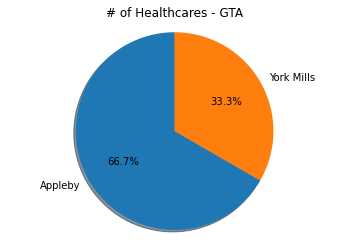

In [39]:
# Pie Graph of Healthcare count
#To remove zero values
group_healthcare_g = gta_5top_dropped.groupby(["AreaName"]).max()["# of Healthcares"].reset_index()
group_healthcare_m= pd.DataFrame(group_healthcare_g[group_healthcare_g['# of Healthcares'] != 0])
group_healthcare_m


plt.title("# of Healthcares - GTA")
plt.pie(group_healthcare_m['# of Healthcares'], labels = group_healthcare_m["AreaName"], autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("output_data/fig11")
plt.show()

# Correlation between Price & # of amenities in the neighborhood

# Correlation - TORONTO

MODERATE correlation (0.69) between both as per showing following

In [40]:
#to calculate the corelation btw price and # of amenities in the area

toronto_5top_2 = toronto_5top_merged.copy()
toronto_5top_2['Total Amenities'] = toronto_5top_2['# of Schools'] + toronto_5top_2['# of Daycares'] + toronto_5top_2['# of Healthcares'] 
toronto_5top_2

toronto_mean_price = toronto_5top_2.iloc[:,2]
toronto_amenities = toronto_5top_2.iloc[:,12]
correlation = st.pearsonr(toronto_mean_price,toronto_amenities)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.69


The correlation between both factors is 0.69


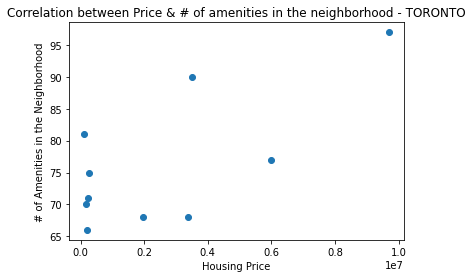

In [41]:
# Compare the calcualted Pearson's r to the plots
plt.scatter(toronto_mean_price,toronto_amenities)
plt.xlabel('Housing Price')
plt.ylabel('# of Amenities in the Neighborhood')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.title('Correlation between Price & # of amenities in the neighborhood - TORONTO')
plt.savefig("output_data/fig12")
plt.show()

# Correlation - GTA

> Strong correlation (0.82) between both as per showing following

In [42]:
#to calculate the corelation btw price and # of amenities in the area

gta_5top_dropped_1 = gta_5top_dropped.copy()
gta_5top_dropped_1['Total Amenities'] = gta_5top_dropped_1['# of Schools'] + gta_5top_dropped_1['# of Daycares'] + gta_5top_dropped_1['# of Healthcares'] 
gta_5top_dropped_1

gta_mean_price = gta_5top_dropped_1.iloc[:,2]
gta_amenities = gta_5top_dropped_1.iloc[:,12]
correlation = st.pearsonr(gta_mean_price,gta_amenities)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.82


The correlation between both factors is 0.82


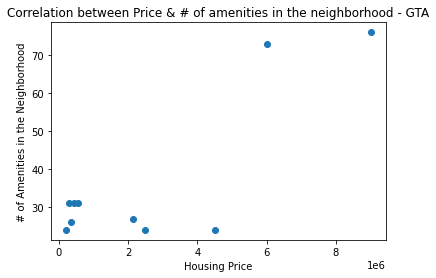

In [43]:
# Compare the calcualted Pearson's r to the plots
plt.scatter(gta_mean_price,gta_amenities)
plt.xlabel('Housing Price')
plt.ylabel('# of Amenities in the Neighborhood')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.title('Correlation between Price & # of amenities in the neighborhood - GTA')
plt.savefig("output_data/fig13")
plt.show()